In [12]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np

data = pd.read_csv("Crime_Data_from_2010_to_Present.csv", 
                   usecols = ["DR Number","Date Occurred", 
                              "Time Occurred", "Area ID", "Crime Code", "Victim Age", "Victim Sex", "Victim Descent"])

print(data.shape)
print(data.dtypes)
data.head()

(1687679, 8)
DR Number           int64
Date Occurred      object
Time Occurred       int64
Area ID             int64
Crime Code          int64
Victim Age        float64
Victim Sex         object
Victim Descent     object
dtype: object


,DR Number,Date Occurred,Time Occurred,Area ID,Crime Code,Victim Age,Victim Sex,Victim Descent
0,1208575,03/11/2013,1800,12,626,30.0,F,W
1,102005556,01/22/2010,2300,20,510,NaN,NaN,NaN
2,418,03/18/2013,2030,18,510,12.0,NaN,NaN
3,101822289,11/10/2010,1800,18,510,NaN,NaN,NaN
4,42104479,01/04/2014,2300,21,745,84.0,M,W


In [13]:
#PREPROCESSING
#Data Transformation: Map all values, nominal or otherwise, to string values for association rule mining
#Data Reduction: Create groups for values (e.g., create 4-hour intervals for time) 
#   in order to find more frequent patterns

#Crime Features: Time, Location, Type
data['Date Occurred'] = pd.to_datetime(data['Date Occurred'],yearfirst=True)
#Split Date into new Year, Month, Day columns
data["Year Occurred"] = data["Date Occurred"].dt.year
data["Month Occurred"] = data["Date Occurred"].dt.month
data["Day of Week"] = data["Date Occurred"].dt.dayofweek

day_map = {0:"Sunday",1:"Monday",2:"Tuesday",3:"Wednesday",4:"Thursday",5:"Friday",6:"Saturday"}
year_map = {2010:"2013",2011:"2011",2012:"2012",2013:"2013",2014:"2014",2015:"2015",2016:"2016",2017:"2017",2018:"2018"}

#Group months into Q1, Q2, Q3, Q4
month_map = {}
for key in [1,2,3]:
    month_map[key] = "Q1"
for key in [4,5,6]:
    month_map[key] = "Q2"
for key in [7,8,9]:
    month_map[key] = "Q3"
for key in [10,11,12]:
    month_map[key] = "Q4"

#Group Time values into 4-hour intervals
time_map = {}
#T0: 1am to 4:59am
for key in range(100,460):
    time_map[key] = "1am to 4:59am"
#T1: 5am to 8:59am
for key in range(500,860):
    time_map[key] = "5am to 8:59am"
#T2: 9am to 12:59pm
for key in range(900,1260):
    time_map[key] = "9am to 12:59pm"
#T3: 1pm to 4:59pm
for key in range(1300,1660):
    time_map[key] = "1pm to 4:59pm"
#T4: 5pm to 8:59pm
for key in range(1700,2060):
    time_map[key] = "5pm to 8:59pm"
#T5: 9pm to 12:59am
for key in range(2100,2360):
    time_map[key] = "9pm to 12:59am"
for key in range(0,60):
    time_map[key] = "9pm to 12:59am"

#Group Crime Codes as "Property" or "Violent"
crime_map = {}
for key in [210,220,310,320,330,331,341,343,345,347, 349,350,351,352,353,354,410,420,421, 432,433,434,439,440,441,442,443,444, 445,446,450,451,452,453, 470,471, 472, 473,474,475,480,485,487,510,520,649,651, 652,653, 654, 660,661,662,664,666,668,670,740,745,760,814,822,888,890,900,903, 906,921,924,926,942,944,946, 948,949,950,951,954]:
    crime_map[key] = "Property"
for key in [110,113,121,122,230,231,235,236,237,250,251,435,436,437,438,622,623,624,625,626,627,647,648,753,755,756,761,762,763,805,806,810,812,813,815,820,821,830,840,850,860,865,870,880,882,884,886,901,902,910,920,922,928,930,931,932,933,940,943,952,956]:
    crime_map[key] = "Violent"

#Group LAPD Geographic Areas by their corresponding bureaus
area_map = {}
#A0: Central
for key in [1,2,4,11,13]:
    area_map[key] = "Central"
#A1: South
for key in [3,5,12,18]:
    area_map[key] = "South"
#A2: West
for key in [6,7,8,14,20]:
    area_map[key] = "West"
#A3: Valley
for key in [9,10,15,16,17,19,21]:
    area_map[key] = "Valley"

    
#Victim Features: Sex, Age, Descent
sex_map = {}
for key in ["M"]:
    sex_map[key] = "Male"
for key in ["F"]:
    sex_map[key] = "Female"
for key in ["H", "X", "-"]:
    sex_map[key] = np.NaN

age_map = {}
for key in [0,1,2,3,4,5,6,7,8,9]:
    age_map[key] = "Age 0-9"
for key in [10,11,12,13,14,15,16,17,18,19]:
    age_map[key] = "Age 10-19"
for key in [20,21,22,23,24,25,26,27,28,29]:
    age_map[key] = "Age 20-29"
for key in [30,31,32,33,34,35,36,37,38,39]:
    age_map[key] = "Age 30-39"
for key in [40,41,42,43,44,45,46,47,48,49]:
    age_map[key] = "Age 40-49"
for key in [50,51,52,53,54,55,56,57,58,59]:
    age_map[key] = "Age 50-59"
for key in [60,61,62,63,64,65,66,67,68,69]:
    age_map[key] = "Age 60-69"
for key in [70,71,72,73,74,75,76,77,78,79]:
    age_map[key] = "Age 70-79"
for key in [80,81,82,83,84,85,86,87,88,89]:
    age_map[key] = "Age 80-89"
for key in [90,91,92,93,94,95,96,97,98,99]:
    age_map[key] = "Age 90-99"
    
descent_map = {}
#D0: Asian
for key in ["A", "C", "D", "F", "J", "K", "L", "V", "Z"]:
    descent_map[key] = "Asian"
#D1: Pacific Islander
for key in ["G", "P", "S", "U"]:
    descent_map[key] = "Pacific Islander"
#D2: Black
for key in ["B"]:
    descent_map[key] = "Black"
#D3: Hispanic/Latinx
for key in ["H"]:
    descent_map[key] = "Hispanic/Latinx"
#D4: American Indian/Alaska Native
for key in ["I"]:
    descent_map[key] = "AmerIndian/Alaska Native"
#D5: White
for key in ["W"]:
    descent_map[key] = "White"
#D6: Other
for key in ["O"]:
    descent_map[key] = "Other"
#Unknown
for key in ["X", "-"]:
    descent_map[key] = np.NaN   

In [14]:
#PREPROCESSING
#Apply mappings, clear out null values
data["Day of Week"].update( data["Day of Week"].map(day_map))
data["Year Occurred"].update( data["Year Occurred"].map(year_map))
data["Month Occurred"].update( data["Month Occurred"].map(month_map) )
data["Time Occurred"].update( data["Time Occurred"].map(time_map) )
data["Area ID"].update( data["Area ID"].map(area_map) )
data["Crime Code"].update( data["Crime Code"].map(crime_map) )
data = data.replace({"Victim Sex":sex_map}) #this ensures that certain values are mapped to NaN
data["Victim Age"].update( data["Victim Age"].map(age_map) )
data = data.replace({"Victim Descent":descent_map})
data = data.dropna(axis=0)
print(data.shape)
print(data.dtypes)
data.head()

(1398328, 11)
DR Number                  int64
Date Occurred     datetime64[ns]
Time Occurred             object
Area ID                   object
Crime Code                object
Victim Age                object
Victim Sex                object
Victim Descent            object
Year Occurred             object
Month Occurred            object
Day of Week               object
dtype: object


,DR Number,Date Occurred,Time Occurred,Area ID,Crime Code,Victim Age,Victim Sex,Victim Descent,Year Occurred,Month Occurred,Day of Week
0,1208575,2013-03-11,5pm to 8:59pm,South,Violent,Age 30-39,Female,White,2013,Q1,Sunday
4,42104479,2014-01-04,9pm to 12:59am,Valley,Property,Age 80-89,Male,White,2014,Q1,Friday
5,120125367,2013-01-08,1pm to 4:59pm,Central,Violent,Age 40-49,Female,White,2013,Q1,Monday
9,120908292,2013-01-15,5am to 8:59am,Valley,Property,Age 20-29,Female,Other,2013,Q1,Monday
12,121207315,2013-02-13,9am to 12:59pm,South,Property,Age 40-49,Male,Hispanic/Latinx,2013,Q1,Tuesday


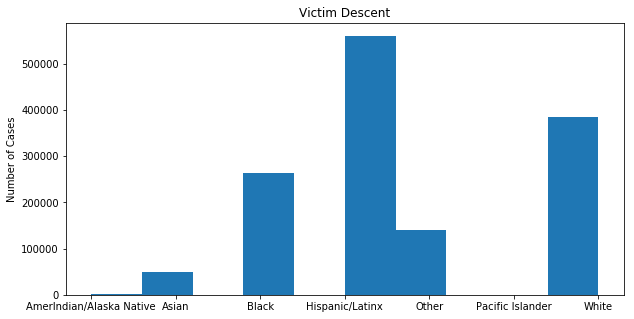

In [15]:
#Visualize attributes of dataset after preprocessing
plt.figure(figsize=(10,5))
plt.hist(data["Victim Descent"])
plt.title("Victim Descent")
#plt.xlabel("Race of Victim")
plt.ylabel("Number of Cases")
plt.show()

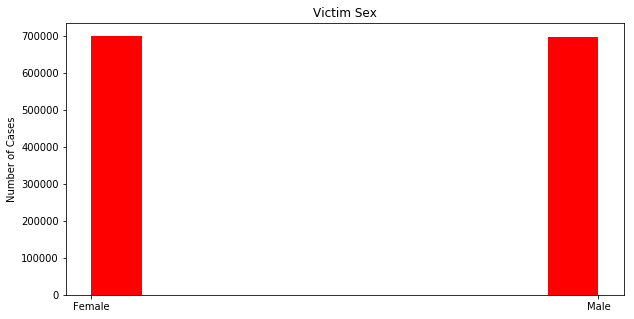

In [16]:
plt.figure(figsize=(10,5))
plt.hist(data["Victim Sex"],facecolor="red")
plt.title("Victim Sex")
#plt.xlabel("Sex of Victim")
plt.ylabel("Number of Cases")
plt.show()

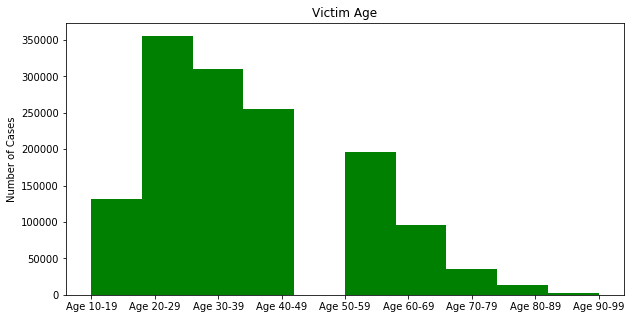

In [17]:
plt.figure(figsize=(10,5))
plt.hist(data["Victim Age"],facecolor='green')
plt.title("Victim Age")
#plt.xlabel("Age of Victim")
plt.ylabel("Number of Cases")
plt.show()

In [18]:
#Separate data by violent and property crime
v_data= data[data["Crime Code"] == "Violent"]
p_data = data[data["Crime Code"] == "Property"]

In [19]:
#Victim information (age, sex, descent, area) from both datasets collected into arrays
#Temporal attributes are not included in the final source code because they did not appear in any frequent patterns
v_victim = np.column_stack((v_data["Victim Age"],v_data["Victim Sex"],v_data["Victim Descent"],v_data["Area ID"]))
p_victim = np.column_stack((p_data["Victim Age"],p_data["Victim Sex"],p_data["Victim Descent"],p_data["Area ID"]))

In [20]:
from mlxtend.preprocessing import TransactionEncoder
#Transform arrays into transaction tables for apriori algorithm
te = TransactionEncoder()
te_ary = te.fit(v_victim).transform(v_victim)
v_victim_df = pd.DataFrame(te_ary, columns=te.columns_)
te_ary = te.fit(p_victim).transform(p_victim)
p_victim_df = pd.DataFrame(te_ary, columns=te.columns_)
v_victim_df.head()

,Age 10-19,Age 20-29,Age 30-39,Age 40-49,Age 50-59,Age 60-69,Age 70-79,Age 80-89,Age 90-99,AmerIndian/Alaska Native,...,Central,Female,Hispanic/Latinx,Male,Other,Pacific Islander,South,Valley,West,White
0,False,False,True,False,False,False,False,False,False,False,...,False,True,False,False,False,False,True,False,False,True
1,False,False,False,True,False,False,False,False,False,False,...,True,True,False,False,False,False,False,False,False,True
2,False,True,False,False,False,False,False,False,False,False,...,False,False,True,True,False,False,True,False,False,False
3,True,False,False,False,False,False,False,False,False,False,...,False,True,True,False,False,False,True,False,False,False
4,False,True,False,False,False,False,False,False,False,False,...,True,False,True,True,False,False,False,False,False,False


In [21]:
#Mine for association rules with certain support, lift, confidence, and leverage thresholds to ensure correlation
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
freq_v_vict = apriori(v_victim_df, min_support=0.1, use_colnames=True)
v_vict_rules = association_rules(freq_v_vict, metric="lift", min_threshold=1)
v_vict_rules
v_vict_rules[ (v_vict_rules['lift'] > 1) & 
       (v_vict_rules['confidence'] >= 0.5) &
       (v_vict_rules['leverage'] >= 0.01) ].sort_values('lift',ascending=False)

,antecedants,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
11,(South),(Black),0.273208,0.253128,0.142881,0.522974,2.066043,0.073724,1.565684
10,(Black),(South),0.253128,0.273208,0.142881,0.564460,2.066043,0.073724,1.668714
12,(Central),(Hispanic/Latinx),0.244794,0.473884,0.153514,0.627116,1.323354,0.037510,1.410938
19,(South),(Female),0.273208,0.587924,0.177047,0.648030,1.102234,0.016421,1.170769
8,(Black),(Female),0.253128,0.587924,0.163200,0.644733,1.096627,0.014380,1.159906
0,(Age 20-29),(Female),0.292520,0.587924,0.187839,0.642141,1.092218,0.015860,1.151503
2,(Age 20-29),(Hispanic/Latinx),0.292520,0.473884,0.150139,0.513260,1.083092,0.011518,1.080897
21,(Valley),(Hispanic/Latinx),0.292076,0.473884,0.148697,0.509105,1.074325,0.010287,1.071749


In [22]:
freq_p_vict = apriori(p_victim_df, min_support=0.1, use_colnames=True)
p_vict_rules = association_rules(freq_p_vict, metric="lift", min_threshold=1)
p_vict_rules[ (p_vict_rules['lift'] > 1) & 
       (p_vict_rules['confidence'] >= 0.5) &
       (p_vict_rules['leverage'] >= 0.01) ].sort_values('lift',ascending=False)

,antecedants,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
8,(Central),(Hispanic/Latinx),0.194174,0.362665,0.100627,0.51823,1.428949,0.030207,1.322902
